0: Object (DummyInterface): Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1: Object space (AirGap): Gap(t=10000000000.0, medium=<opticalglass.opticalmedium.Air object at 0x7fabe913e340>)
2: E13 (Element): Element: EvenPolynomial(c=0.01234506937928991, cc=0.0, coefs=[0.0, 3.63823e-06, -2.57284e-08, 2.13341e-10, -5.87072e-13, 0.0, 0.0]), EvenPolynomial(c=-0.03181876034109711, cc=0.0, coefs=[0.0, 1.17867e-05, -3.91138e-08, 2.32768e-10, -5.55678e-13, 0.0, 0.0]), t=6.4100, sd=10.1573, glass: NBFD13
3: Image (DummyInterface): Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')
4: Image space (AirGap): Gap(t=27.804807744234232, medium=<opticalglass.opticalmedium.Air object at 0x7fabb8129130>)
              r            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  1.4054e+09
    1:    81.004000      6.41000    NBFD13             1      10.093
    2:   -31.428000      27.8048       air             1      1

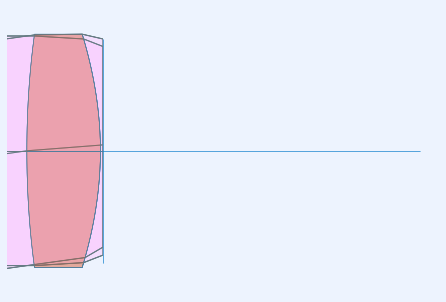

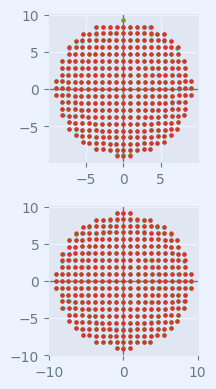

In [15]:
from rayoptics.environment import *

opm = OpticalModel()
opm.radius_mode = True

osp = opm['optical_spec']
osp['pupil'] = PupilSpec(osp, key=['object', 'pupil'], value=20)

osp['fov'] = FieldSpec(osp, key=['object', 'angle'], value=32.0, flds=[0,0.5], is_relative=True)
osp['wvls'] = WvlSpec([(486.1327, 0.5), (587.5618, 1.0), (656.2725, 0.5)], ref_wl=1)

    
sm = opm['seq_model']   
em = opm['ele_model']    
    
sm.gaps[0].thi = 1e10
       
sm.add_surface([81.004,6.41,'NBFD13','Hoya'])
sm.ifcs[sm.cur_surface].profile = EvenPolynomial(r=81.004, cc=0.0, coefs=[0.0,3.63823E-6,-2.57284E-8,2.13341E-10,-5.87072E-13,0.0,0.0])
sm.ifcs[sm.cur_surface].max_aperture = 15.66
sm.add_surface([-31.428,0.2])
sm.ifcs[sm.cur_surface].profile = EvenPolynomial(r=-31.428, cc=0.0,coefs=[0.0,1.17867E-5,-3.91138E-8,2.32768E-10,-5.55678E-13,0.0,0.0])
sm.ifcs[sm.cur_surface].max_aperture = 15.66
    
opm.update_model()

sm.gaps[len(sm.gaps)-1].thi = opm['analysis_results']['parax_data'].fod.bfl 

em.list_elements()
sm.list_model()
opm['parax_model'].first_order_data()

layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm).plot()
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm,  dpi=100).plot()